<a href="https://colab.research.google.com/github/amitstudy70/Amit-Personal-Projects/blob/main/Custom_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom model that is used to classify Plumbago Zeylanica leaves in 3 classes

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip -q "/content/gdrive/MyDrive/VU_work_Chitrak/Data.zip"

In [ ]:
import os,glob
import numpy as np

# Data Visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D,GlobalAveragePooling2D,Flatten,Dense,Dropout,MaxPool2D
from keras.callbacks import Callback,EarlyStopping
from keras.applications import Xception
from keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import classification_report
from keras.optimizers import Adam
import tensorflow as tf


In [ ]:
file_path='/content/256 x 256'
name_class=os.listdir(file_path)
name_class

['Dried', 'Healthy', 'Unhealthy']

In [ ]:
file_path='/content/256 x 256'
file_paths = glob.glob(file_path + '/**/*.*', recursive=True)
labels = list(map(lambda x: os.path.split(os.path.split(os.path.split(x)[0])[0])[1], file_paths))
len(file_paths)

10660

In [ ]:
filepath=pd.Series(file_paths,name='FilePath').astype(str)
labels=pd.Series(labels,name='Label')
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.sample(5)

,FilePath,Label
6373,/content/256 x 256/Dried/Single/1741.jpg,Dried
1187,/content/256 x 256/Healthy/Multiple/2929.jpg,Healthy
10090,/content/256 x 256/Healthy/Single/6855.jpg,Healthy
3119,/content/256 x 256/Dried/Single/1309.jpg,Dried
4802,/content/256 x 256/Healthy/Single/4959.jpg,Healthy


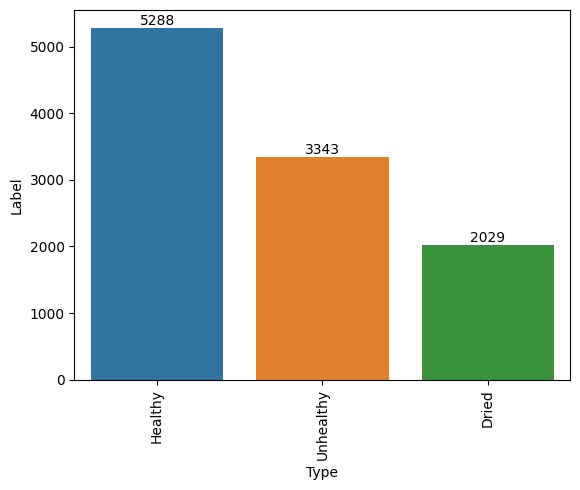

In [ ]:
counts=data.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

# Annotate each bar with the exact count
for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
train,test =train_test_split(data,test_size=0.25,random_state=42)

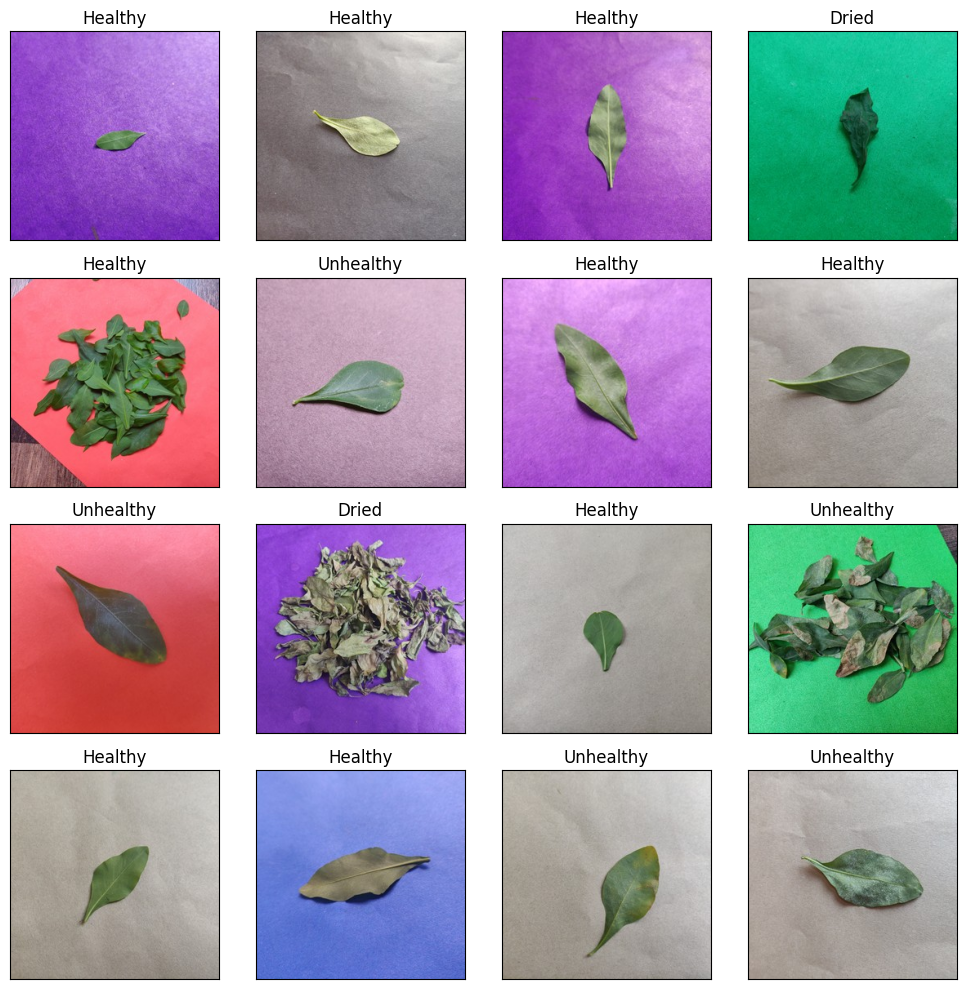

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.FilePath[i]))
    ax.set_title(data.Label[i])

plt.tight_layout()
plt.show()


In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

In [ ]:
train_gen=train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='FilePath',
    y_col='Label',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    zoom_range = 0.2,
    seed=42
)

valid_gen=train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='FilePath',
    y_col='Label',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    zoom_range = 0.2,
    seed=42
)

test_gen=test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='FilePath',
    y_col='Label',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    zoom_range = 0.2,
    shuffle=False
)



Found 7995 validated image filenames belonging to 3 classes.
Found 2665 validated image filenames belonging to 3 classes.
Found 2665 validated image filenames belonging to 3 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())


model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())




model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation = "sigmoid"))
model.add(Dense(3, activation="softmax"))

model.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 112, 112, 128)     36992     
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 56, 56, 128)       0         
                                                                 
 conv2d_59 (Conv2D)          (None, 56, 56, 64)      

In [ ]:
opt = Adam(learning_rate=0.01)
# model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks_ = [EarlyStopping(monitor = 'val_accuracy',
                 min_delta = 0,
                 patience = 2,
                 mode = 'auto')]

In [ ]:
# history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30
)

#epoch 25 - 96.7% acc , 19 96% acc are best , 28 - 96.77% acc

250/250 [==============================] - 33s 132ms/step - loss: 0.0605 - accuracy: 0.9797 - val_loss: 0.1318 - val_accuracy: 0.9614


In [ ]:
model.save('/content/drive/MyDrive/VU_work_Chitrak/Custom_model.h5')

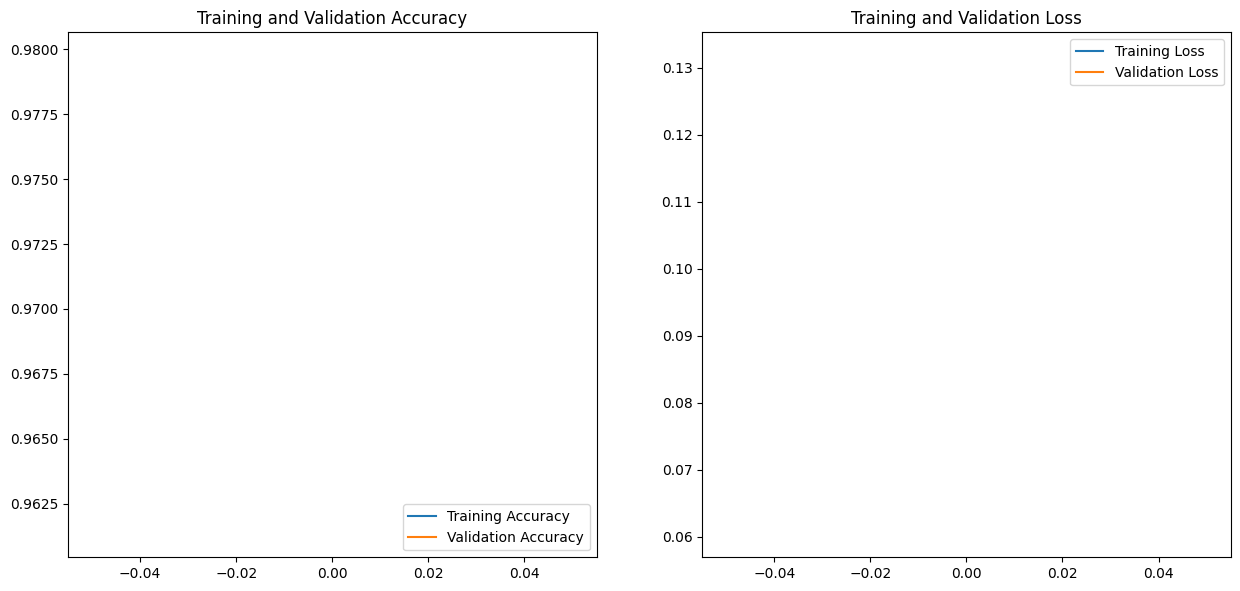

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
results=model.evaluate(test_gen,verbose=0)

print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accurracy: {:.2f}%'.format(results[1]*100))

Test Loss: 0.13176
Test Accurracy: 96.14%


In [ ]:
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

84/84 [==============================] - 6s 75ms/step


In [ ]:
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Dried       0.99      0.98      0.99       503
     Healthy       0.96      0.97      0.96      1311
   Unhealthy       0.95      0.94      0.94       851

    accuracy                           0.96      2665
   macro avg       0.97      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665



Exception ignored in: <function _xla_gc_callback at 0x7962b9b31bd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


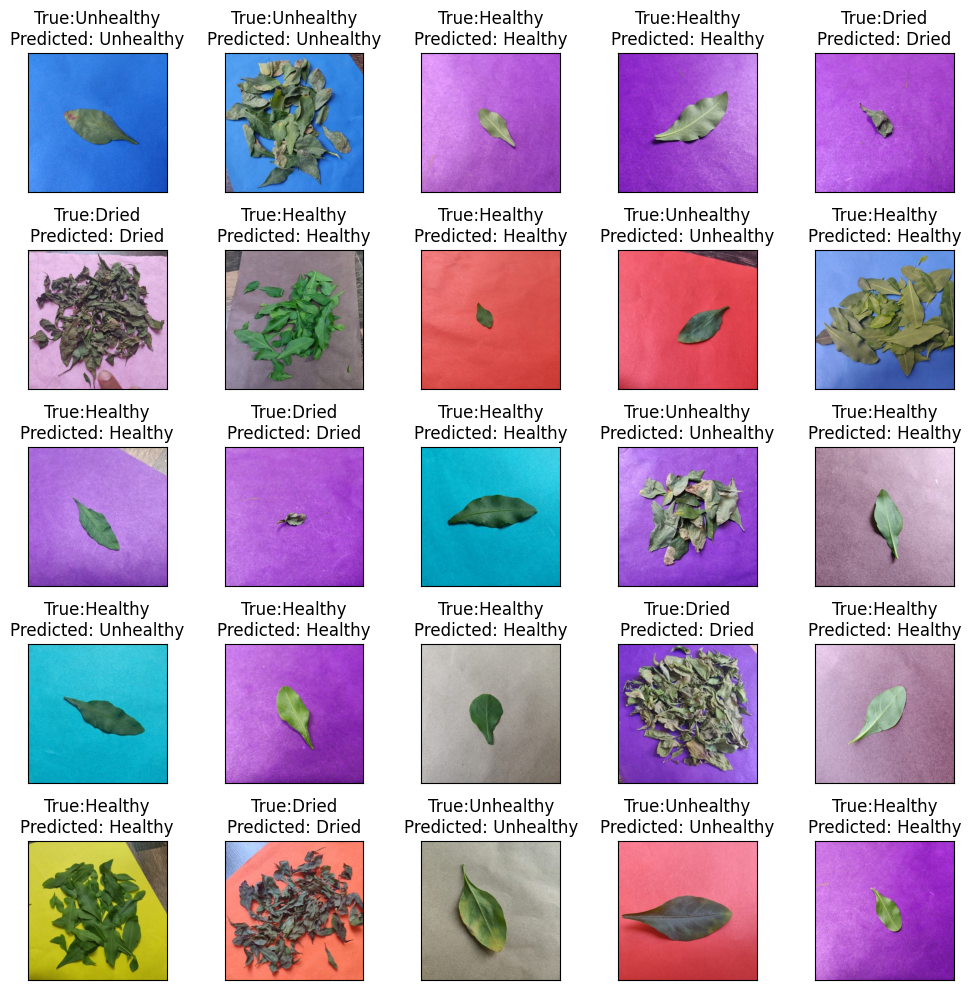

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=5,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.FilePath.iloc[i]))
    ax.set_title(f'True:{test.Label.iloc[i]}\nPredicted: {pred[i]}')

plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    num_classes = len(class_names)
    plt.xticks(np.arange(num_classes), class_names, rotation=45)
    plt.yticks(np.arange(num_classes), class_names)

    plt.xlabel('Predicted')
    plt.ylabel('True')

    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if i == j else 'black')

    plt.tight_layout()
    plt.show()

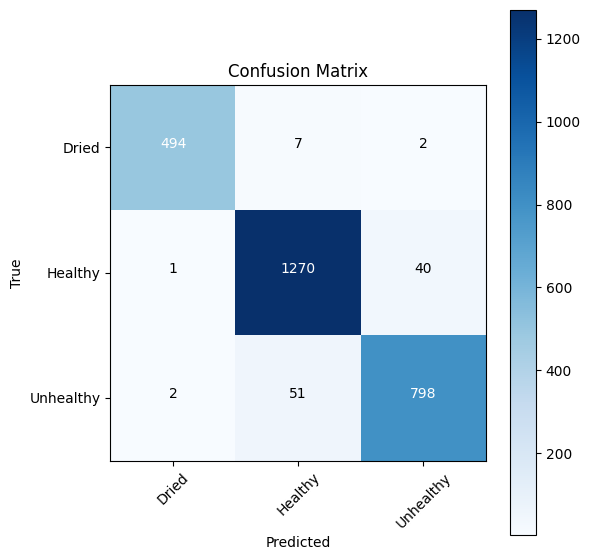

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred)
class_names = list(labels.values())
plot_confusion_matrix(conf_matrix, class_names)

# **Detection of the leaf**

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread,imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions,preprocess_input


In [ ]:
img_path='/content/256 x 256/Unhealthy/Multiple/7379.jpg'

img=cv2.imread(img_path)
img=cv2.resize(img,(224,224))

x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
result=model.predict(x)

p=(result*100).astype('int')
pp=list(p[0])

index=pp.index(max(pp))
print(f' Plumbago Zeylanica Detected: {class_names[index]}')

1/1 [==============================] - 0s 101ms/step
 Plumbago Zeylanica Detected: Unhealthy
